# Swiggy Data Science Assessment - LinkedIn, MTV Get a Job

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans

## Import Dataset and Quick Inspection

In [40]:
dataset_path = './data/SampleAssessment.csv'
df = pd.read_csv(dataset_path)

In [41]:
df.head()

,customer_id,First Time,Recent Time,# of Orders,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount,Amount in last 7 days,Amount in last 4 weeks,Avg_DistanceFromResturant,Avg_DeliveryTime
0,1269647,6/29/15 10:57,12/10/15 2:18,212,6.0,43.0,138808,4291,26853,1.6,51
1,167631,7/4/15 15:39,12/15/15 14:42,211,8.0,19.0,56404,1925,4177,2.2,42
2,301524,6/26/15 9:56,12/9/15 20:45,189,9.0,33.0,36020,1772,6404,2.5,57
3,1268254,7/1/15 1:51,12/14/15 1:43,184,6.0,37.0,32489,975,7110,3.1,55
4,357161,7/11/15 18:34,12/19/15 23:26,182,4.0,23.0,85150,1738,9958,2.4,36


In [42]:
df.tail()

,customer_id,First Time,Recent Time,# of Orders,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount,Amount in last 7 days,Amount in last 4 weeks,Avg_DistanceFromResturant,Avg_DeliveryTime
9995,995495,12/5/15 5:41,12/5/15 10:58,1,NaN,1.0,69,0,69,1.3,23
9996,337003,7/17/15 12:30,7/20/15 17:43,1,NaN,NaN,305,0,0,2.9,49
9997,993928,11/11/15 20:27,11/14/15 21:05,1,NaN,NaN,85,0,0,2.2,53
9998,398583,7/6/15 4:25,7/10/15 20:19,1,NaN,NaN,630,0,0,-0.1,20
9999,462448,7/25/15 0:36,7/25/15 6:21,1,NaN,NaN,293,0,0,3.7,49


In [43]:
df.columns = ['customer_id', 'first_time', 'recent_time', 'no_of_orders', 'orders_7_days', 'orders_last_4_weeks', 'amount', 'amt_last_7_days', 'amt_in_last_4_weeks', 'avg_dist_rest', 'avg_del_time']

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
customer_id            10000 non-null int64
first_time             10000 non-null object
recent_time            10000 non-null object
no_of_orders           10000 non-null int64
orders_7_days          1923 non-null float64
orders_last_4_weeks    4341 non-null float64
amount                 10000 non-null int64
amt_last_7_days        10000 non-null int64
amt_in_last_4_weeks    10000 non-null int64
avg_dist_rest          10000 non-null float64
avg_del_time           10000 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [45]:
df.describe().round(2)

,customer_id,no_of_orders,orders_7_days,orders_last_4_weeks,amount,amt_last_7_days,amt_in_last_4_weeks,avg_dist_rest,avg_del_time
count,10000.00,10000.00,1923.00,4341.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,671402.32,7.01,1.73,3.20,2253.27,109.50,455.49,2.36,36.91
std,390187.96,13.12,1.37,3.94,5136.48,397.06,1237.87,0.97,13.18
min,28.00,1.00,1.00,1.00,1.00,0.00,0.00,-0.80,15.00
25%,336514.75,1.00,1.00,1.00,279.00,0.00,0.00,1.70,26.00
50%,668339.50,2.00,1.00,2.00,688.00,0.00,0.00,2.40,36.50
75%,1005002.00,7.00,2.00,4.00,2040.00,0.00,398.00,3.02,47.00
max,1355445.00,212.00,14.00,46.00,138808.00,10150.00,26853.00,5.90,83.00


In [46]:
df['first_time'] = pd.to_datetime(df['first_time'])
df['recent_time'] = pd.to_datetime(df['recent_time'])

In [47]:
df.head()

,customer_id,first_time,recent_time,no_of_orders,orders_7_days,orders_last_4_weeks,amount,amt_last_7_days,amt_in_last_4_weeks,avg_dist_rest,avg_del_time
0,1269647,2015-06-29 10:57:00,2015-12-10 02:18:00,212,6.0,43.0,138808,4291,26853,1.6,51
1,167631,2015-07-04 15:39:00,2015-12-15 14:42:00,211,8.0,19.0,56404,1925,4177,2.2,42
2,301524,2015-06-26 09:56:00,2015-12-09 20:45:00,189,9.0,33.0,36020,1772,6404,2.5,57
3,1268254,2015-07-01 01:51:00,2015-12-14 01:43:00,184,6.0,37.0,32489,975,7110,3.1,55
4,357161,2015-07-11 18:34:00,2015-12-19 23:26:00,182,4.0,23.0,85150,1738,9958,2.4,36


## Number of missing values (orders in 7 days and last 4 weeks)

In [48]:
df.isna().sum()

customer_id               0
first_time                0
recent_time               0
no_of_orders              0
orders_7_days          8077
orders_last_4_weeks    5659
amount                    0
amt_last_7_days           0
amt_in_last_4_weeks       0
avg_dist_rest             0
avg_del_time              0
dtype: int64

## Verifying whether the amount is zero for no orders

In [49]:
(df['amt_last_7_days'] == 0).sum(axis=0)

8078

In [50]:
(df['amt_in_last_4_weeks'] == 0).sum(axis=0)

5660

## Description of the subset of dataset with negative restaurant distances

In [51]:
df[df['avg_dist_rest'] < 0].describe().round(2)

,customer_id,no_of_orders,orders_7_days,orders_last_4_weeks,amount,amt_last_7_days,amt_in_last_4_weeks,avg_dist_rest,avg_del_time
count,4.400000e+01,44.000000,9.000000,13.000000,44.000000,44.00000,44.000000,44.000000,44.000000
mean,7.017121e+05,2.045455,2.000000,3.153846,555.113636,73.75000,213.340909,-0.229545,31.272727
std,3.519936e+05,2.391405,1.224745,3.555422,521.282730,186.17835,503.977664,0.192390,11.006053
min,9.736000e+03,1.000000,1.000000,1.000000,2.000000,0.00000,0.000000,-0.800000,16.000000
25%,4.100002e+05,1.000000,1.000000,1.000000,224.250000,0.00000,0.000000,-0.300000,21.000000
50%,7.090345e+05,1.000000,2.000000,1.000000,436.000000,0.00000,0.000000,-0.100000,30.000000
75%,1.006586e+06,2.000000,2.000000,4.000000,706.500000,0.00000,192.250000,-0.100000,41.000000
max,1.314153e+06,13.000000,4.000000,12.000000,2355.000000,814.00000,2355.000000,-0.100000,52.000000


## Description of the original dataset with negative restaurant distances

In [52]:
df.describe().round(2)

,customer_id,no_of_orders,orders_7_days,orders_last_4_weeks,amount,amt_last_7_days,amt_in_last_4_weeks,avg_dist_rest,avg_del_time
count,1.000000e+04,10000.000000,1923.000000,4341.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,6.714023e+05,7.006200,1.734789,3.197650,2253.273600,109.497500,455.491200,2.35620,36.914300
std,3.901880e+05,13.118619,1.369875,3.940818,5136.484499,397.055277,1237.872749,0.97492,13.175413
min,2.800000e+01,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-0.80000,15.000000
25%,3.365148e+05,1.000000,1.000000,1.000000,279.000000,0.000000,0.000000,1.70000,26.000000
50%,6.683395e+05,2.000000,1.000000,2.000000,688.000000,0.000000,0.000000,2.40000,36.500000
75%,1.005002e+06,7.000000,2.000000,4.000000,2040.000000,0.000000,398.000000,3.02500,47.000000
max,1.355445e+06,212.000000,14.000000,46.000000,138808.000000,10150.000000,26853.000000,5.90000,83.000000


## Description of the dataset without negative restaurant distances

In [53]:
df[df['avg_dist_rest'] > 0].describe().round(2)

,customer_id,no_of_orders,orders_7_days,orders_last_4_weeks,amount,amt_last_7_days,amt_in_last_4_weeks,avg_dist_rest,avg_del_time
count,9.934000e+03,9934.000000,1911.000000,4323.000000,9934.00000,9934.000000,9934.000000,9934.000000,9934.000000
mean,6.711528e+05,7.039964,1.734694,3.199399,2264.57570,109.824945,457.245218,2.372871,36.937487
std,3.904329e+05,13.154371,1.371454,3.943907,5151.28199,398.132535,1241.058089,0.956260,13.180592
min,2.800000e+01,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.100000,15.000000
25%,3.357308e+05,1.000000,1.000000,1.000000,280.00000,0.000000,0.000000,1.700000,26.000000
50%,6.673780e+05,2.000000,1.000000,2.000000,691.00000,0.000000,0.000000,2.400000,37.000000
75%,1.004866e+06,7.000000,2.000000,4.000000,2060.75000,0.000000,401.750000,3.100000,47.000000
max,1.355445e+06,212.000000,14.000000,46.000000,138808.00000,10150.000000,26853.000000,5.900000,83.000000


* The mean and standard deviation are not much affected by the removal of negative disatances
* The above dataset will be use for further evaluations
* The rows with negative values are thereby discarded

In [58]:
df = df[df['avg_dist_rest'] > 0]
df.describe().round(2)

,customer_id,no_of_orders,orders_7_days,orders_last_4_weeks,amount,amt_last_7_days,amt_in_last_4_weeks,avg_dist_rest,avg_del_time
count,9934.00,9934.00,1911.00,4323.00,9934.00,9934.00,9934.00,9934.00,9934.00
mean,671152.80,7.04,1.73,3.20,2264.58,109.82,457.25,2.37,36.94
std,390432.93,13.15,1.37,3.94,5151.28,398.13,1241.06,0.96,13.18
min,28.00,1.00,1.00,1.00,1.00,0.00,0.00,0.10,15.00
25%,335730.75,1.00,1.00,1.00,280.00,0.00,0.00,1.70,26.00
50%,667378.00,2.00,1.00,2.00,691.00,0.00,0.00,2.40,37.00
75%,1004865.75,7.00,2.00,4.00,2060.75,0.00,401.75,3.10,47.00
max,1355445.00,212.00,14.00,46.00,138808.00,10150.00,26853.00,5.90,83.00


## Correlation

In [71]:
df.corr()

,customer_id,no_of_orders,orders_7_days,orders_last_4_weeks,amount,amt_last_7_days,amt_in_last_4_weeks,avg_dist_rest,avg_del_time
customer_id,1.000000,-0.012781,-0.047381,-0.040049,-0.000461,0.039074,0.059003,-0.026025,-0.029990
no_of_orders,-0.012781,1.000000,0.540287,0.753253,0.763145,0.375196,0.534801,-0.026490,0.003167
orders_7_days,-0.047381,0.540287,1.000000,0.727008,0.411076,0.519193,0.505799,-0.016251,-0.004929
orders_last_4_weeks,-0.040049,0.753253,0.727008,1.000000,0.579266,0.459385,0.681916,-0.031855,0.017876
amount,-0.000461,0.763145,0.411076,0.579266,1.000000,0.501629,0.706240,-0.020224,0.001974
amt_last_7_days,0.039074,0.375196,0.519193,0.459385,0.501629,1.000000,0.710047,0.002372,-0.001744
amt_in_last_4_weeks,0.059003,0.534801,0.505799,0.681916,0.706240,0.710047,1.000000,-0.008472,-0.016539
avg_dist_rest,-0.026025,-0.026490,-0.016251,-0.031855,-0.020224,0.002372,-0.008472,1.000000,0.086058
avg_del_time,-0.029990,0.003167,-0.004929,0.017876,0.001974,-0.001744,-0.016539,0.086058,1.000000


* It appears that there are no other important correlations other than order vs amount

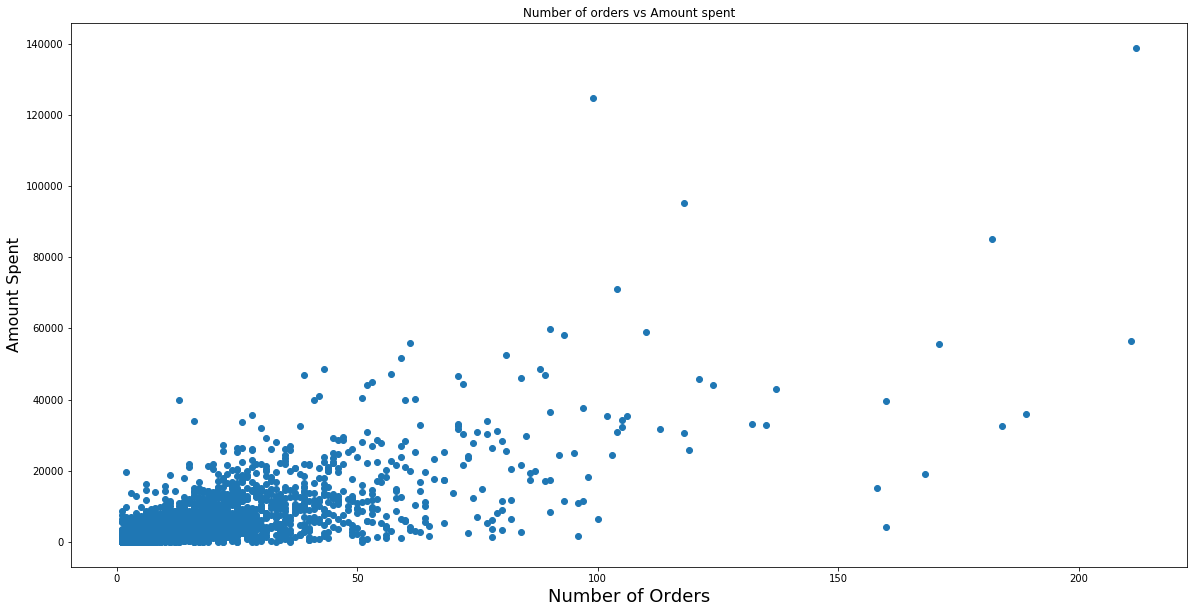

In [74]:
plt.figure(figsize=(20,10))
plt.title('Number of orders vs Amount spent')
plt.xlabel('Number of Orders', fontsize=18)
plt.ylabel('Amount Spent', fontsize=16)
plt.scatter(df['no_of_orders'], df['amount'])
plt.show()